# Solution for Chapter 4.4 of QCQI

Compiled by Takuya Isogawa <tisogawa@keio.jp> / Keio University

## 4.4 Measurement
### Exercise 4.32: 
Suppose $\rho$ is the density matrix describing a two qubit system. Suppose we perform a projective measurement in the computational basis of the second qubit. Let $ P_{0} =\left|0\right>\left<0\right|$ and $ P_{1} =\left|1\right>\left<1\right|$ be the projectors onto the $\left|0\right>$ and $\left|1\right>$ states of the second qubit, respectively. Let $\rho'$ be the density matrix which would be assigned to the system after the measurement by an observer who did not learn the measurement result. Show that
$$
\rho'=P_{0}\rho P_{0}+P_{1}\rho P_{1}.
$$
Also show that the reduced density matrix for the first qubit is not affected by
the measurement, that is, $\mathrm{tr_2}(\rho) =\mathrm{tr_2}(\rho') $.

### Answer:

Let $ \left|\psi\right> = a\left|00\right> + b\left|01\right>+c\left|10\right>+d\left|11\right>$ and rewrite $P_{0}$ and $P_{1}$ explicitly as follows:

$$ 
P_{0} =I \otimes \left|0\right>\left<0\right|,   P_{1} =I \otimes \left|1\right>\left<1\right|\,.
$$

Measuring the second qubit alone gives 0 with probability $p_0=\left|a\right|^2+\left|c\right|^2$ and 1 with probability $p_1=\left|b\right|^2+\left|d\right|^2$, leaving the post-measurement states

$$
\left|\psi_{0}\right> = \frac{ \left( a\left|0\right> +c\left|1\right>\right) \otimes \left|0\right>}{\sqrt{\left|a\right|^2+\left|c\right|^2}},
$$

$$
\left|\psi_{1}\right> = \frac{(b\left|0\right> +d\left|1\right>)\otimes \left|1\right>}{\sqrt{\left|b\right|^2+\left|d\right|^2}}\,.
$$

Define $ \rho =\left|\psi\right>\left<\psi\right|$, $ \rho_{0} =\left|\psi_{0}\right>\left<\psi_{0}\right|$, and $ \rho_{1} =\left|\psi_{1}\right>\left<\psi_{1}\right|$, then the post-measurement density matrix is


\begin{eqnarray}
\rho' &=& p_{0}\rho_{0} +p_{1}\rho_{1} \\
  &=& \left[
    \begin{array}{cc}
      \left|a\right|^2 & ac^* \\
      a^*c & \left|c\right|^2 \\
    \end{array}
  \right] \otimes \left|0\right>\left<0\right| + \left[
    \begin{array}{cc}
      \left|b\right|^2 & bd^* \\
      b^*d & \left|d\right|^2 \\
    \end{array}
  \right] \otimes \left|1\right>\left<1\right| \\
  &=& P_{0}\rho P_{0}+P_{1}\rho P_{1}\,.
  \end{eqnarray}

The reduced density matrix of the post-measurement state for the first qubit is




\begin{eqnarray}
\mathrm{tr_2}(\rho') &=& \left[
    \begin{array}{cc}
      \left|a\right|^2 & ac^* \\
      a^*c & \left|c\right|^2 \\
    \end{array}
  \right]  \left<0|0\right> + \left[
    \begin{array}{cc}
      \left|b\right|^2 & bd^* \\
      b^*d & \left|d\right|^2 \\
    \end{array}
  \right]  \left<1|1\right> \\
  &=& \left[ \begin{array}{cc}
      \left|a\right|^2+\left|b\right|^2 & ac^* + bd^* \\
      a^*c + b^*d & \left|c\right|^2 + \left|d\right|^2 \\
    \end{array} \right] \\
  &=& \mathrm{tr_2}(\rho).
  \end{eqnarray}

In [90]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, quantum_info
from qiskit.quantum_info.operators import Operator
from qiskit import BasicAer as Aer
from qiskit import execute
%matplotlib inline

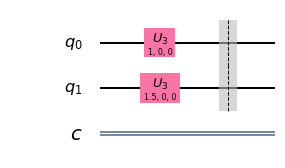

In [91]:
theta0, phi0, lam0 = 1, 0, 0
theta1, phi1, lam1 = 1.5, 0, 0
circuit = QuantumCircuit(2, 1)
circuit.u3(theta0, phi0, lam0,0)
circuit.u3(theta1, phi1, lam1,1)
circuit.barrier()
circuit.draw(output='mpl')

In [92]:
state_backend = Aer.get_backend('statevector_simulator')
job = execute(circuit, state_backend)
result = job.result()
outputstate = result.get_statevector(circuit, decimals=3)
print(outputstate)

[0.642+0.j 0.351+0.j 0.598+0.j 0.327+0.j]


In [93]:
rho = quantum_info.DensityMatrix(outputstate)
print(rho)

DensityMatrix([[0.412164+0.j, 0.225342+0.j, 0.383916+0.j, 0.209934+0.j],
               [0.225342+0.j, 0.123201+0.j, 0.209898+0.j, 0.114777+0.j],
               [0.383916+0.j, 0.209898+0.j, 0.357604+0.j, 0.195546+0.j],
               [0.209934+0.j, 0.114777+0.j, 0.195546+0.j, 0.106929+0.j]],
              dims=(2, 2))


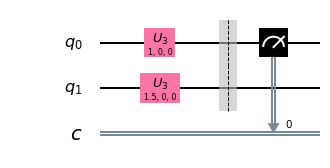

In [94]:
circuit.measure(0, 0)
circuit.draw(output='mpl')

In [95]:
shots = 1024

n0, n1 = 0, 0

for i in range(shots):
    job = execute(circuit, state_backend)
    result = job.result()
    if result.get_counts().get('1', 0):
        n1 += 1
        if n1 == 1:
            outputstate1 = result.get_statevector(circuit, decimals=3)
    else:
        n0 += 1
        if n0 == 1:
            outputstate0 = result.get_statevector(circuit, decimals=3)
        
print(n0, n1)
p0 ,p1 = n0/shots, n1/shots
print(p0, p1)

print(outputstate0)
print(outputstate1)

793 231
0.7744140625 0.2255859375
[0.732+0.j 0.   +0.j 0.682+0.j 0.   +0.j]
[0.   +0.j 0.732+0.j 0.   +0.j 0.682+0.j]


In [96]:
rho0 = quantum_info.DensityMatrix(outputstate0)
rho1 = quantum_info.DensityMatrix(outputstate1)
rho_prime0 = p0*rho0+p1*rho1
print(rho_prime0)

DensityMatrix([[0.41494964+0.j, 0.        +0.j, 0.38660609+0.j,
                0.        +0.j],
               [0.        +0.j, 0.12087436+0.j, 0.        +0.j,
                0.11261791+0.j],
               [0.38660609+0.j, 0.        +0.j, 0.36019857+0.j,
                0.        +0.j],
               [0.        +0.j, 0.11261791+0.j, 0.        +0.j,
                0.10492543+0.j]],
              dims=(2, 2))


In [97]:
rho_prime1 = rho.evolve(Operator([[1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0]]))+rho.evolve(Operator([[0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1]]))
print(rho_prime1)

DensityMatrix([[0.412164+0.j, 0.      +0.j, 0.383916+0.j, 0.      +0.j],
               [0.      +0.j, 0.123201+0.j, 0.      +0.j, 0.114777+0.j],
               [0.383916+0.j, 0.      +0.j, 0.357604+0.j, 0.      +0.j],
               [0.      +0.j, 0.114777+0.j, 0.      +0.j, 0.106929+0.j]],
              dims=(2, 2))


In [98]:
print(quantum_info.partial_trace(rho,[0]))
print(quantum_info.partial_trace(rho_prime0,[0]))
print(quantum_info.partial_trace(rho_prime1,[0]))

DensityMatrix([[0.535365+0.j, 0.498693+0.j],
               [0.498693+0.j, 0.464533+0.j]],
              dims=(2,))
DensityMatrix([[0.535824+0.j, 0.499224+0.j],
               [0.499224+0.j, 0.465124+0.j]],
              dims=(2,))
DensityMatrix([[0.535365+0.j, 0.498693+0.j],
               [0.498693+0.j, 0.464533+0.j]],
              dims=(2,))


### Exercise 4.33: (Measurement in the Bell basis) 
The measurement model we have specified for the quantum circuit model is that measurements are performed only in the computational basis. However, often we want to perform a measurement in some other basis, defined by a complete set of orthonormal states. To perform this measurement, simply unitarily transform from the basis we wish to perform the measurement in to the computational basis, then measure. For example, show that the circuit

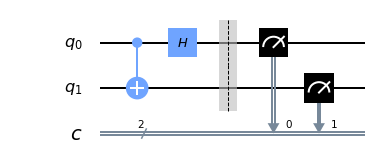

In [99]:
circ = QuantumCircuit(2, 2)
circ.cx(0, 1)
circ.h(0)
circ.barrier()
circ.measure(range(2), range(2))
circ.draw(output='mpl')

performs a measurement in the basis of the Bell states. More precisely, show that this circuit results in a measurement being performed with corresponding POVM elements the four projectors onto the Bell states. What are the corresponding measurement operators?

### Answer:
The circuit to create Bell states is

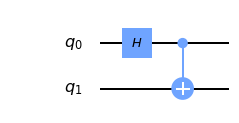

In [100]:
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.draw(output='mpl')

Therefore, the circuit shown in exercise 4.33 performs the inverse operation of creating Bell states. Note that a Hadamard gate and a CNOT gate are Hermitian and unitary. 
Corresponding measurement operators are $\left|\beta_{00}\right>\left<\beta_{00}\right|$, $\left|\beta_{01}\right>\left<\beta_{01}\right|$, $\left|\beta_{10}\right>\left<\beta_{10}\right|$, and $\left|\beta_{11}\right>\left<\beta_{11}\right|$.

### Exercise 4.34: (Measuring an operator)
Suppose we have a single qubit operator $U$ with eigenvalues $\pm{1}$, so that $U$ is both Hermitian and unitary, so it can be regarded both as an observable and a quantum gate. Suppose we wish to measure the observable $U$. That is, we desire to obtain a measurement result indicating one of the two eigenvalues, and leaving a post-measurement state which is the corresponding eigenvector. How can this be implemented by a quantum circuit? Show that the following circuit implements a measurement of $U$:

In [101]:
from qiskit.visualization import plot_bloch_multivector
from qiskit.extensions import Initialize

In order for U3 gate
$$
U3(\theta, \phi, \lambda) = \left(
    \begin{array}{cc}
      \cos \left( \frac{\theta}{2} \right) & -e^{i \lambda}\sin \left( \frac{\theta}{2} \right)  \\
      -e^{i \phi}\sin \left( \frac{\theta}{2} \right) & -e^{i (\phi+\lambda)}\cos \left( \frac{\theta}{2} \right) \\
    \end{array}
  \right) 
$$

to be Hermitian, $\lambda = \pi - \phi$ is necessary and sufficient.

In [102]:
theta2, phi2 = np.pi/2, 0
lam2 = np.pi - phi2

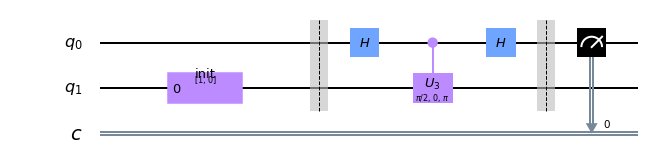

In [103]:
circuit = QuantumCircuit(2, 1)
initial_state = [1,0]
initializer = Initialize(initial_state)
initializer.label = "init"
circuit.append(initializer, [1])
circuit.barrier()
circuit.h(0)
circuit.cu3(theta2, phi2, lam2,0, 1)
circuit.h(0)
circuit.barrier()
circuit.measure(0, 0)
circuit.draw(output='mpl')

### Answer:

Let $\left|u_{+1}\right>$ and $\left|u_{-1}\right>$ be the eigenvectors of $U$ with corresponding eigenvalues $\pm{1}$.The input state $\left|0\right> \otimes \left|\psi_0\right>$ can be written as


$$ 
\left|0\right> \otimes \left|\psi_0\right> = \left|0\right> \otimes \left(\alpha\left|u_{+1}\right>+ \beta \left|u_{-1}\right> \right)
$$



and is sent through a Hadamard gate to give

$$
\left[ \frac{\left|0\right>+\left|1\right>}{\sqrt{2}}\right] \otimes \left[\alpha\left|u_{+1}\right>+ \beta \left|u_{-1}\right> \right]\,.
$$

Applying controlled-$U=\left|u_{+1}\right>\left<u_{+1}\right|-\left|u_{-1}\right>\left<u_{-1}\right|$ to the above state gives

\begin{eqnarray}
&&\frac{\left|0\right>}{\sqrt{2}} \otimes \left[\alpha\left|u_{+1}\right>+ \beta \left|u_{-1}\right> \right]+
\frac{\left|1\right>}{\sqrt{2}} \otimes \left[\alpha\left|u_{+1}\right>- \beta
\left|u_{-1}\right> \right]\\
&=& \alpha \left[\frac{\left|0\right>+ \left|1\right> }{\sqrt{2}}\right]\otimes \left|u_{+1}\right>+
\beta \left[\frac{\left|0\right>- \left|1\right>}{\sqrt{2}}\right]\otimes\left|u_{-1}\right>\,.
\end{eqnarray}

The final Hadamard gate on the first qubit thus gives

$$
\alpha \left|0\right> \otimes \left|u_{+1}\right>+ \beta\left|1\right> \otimes\left|u_{-1}\right> \,,
$$

so by measuring the first qubit we may determine a post-measurement state with an eigenvalue $+1$ or $-1$.

The Bloch representation gives a nice way to visualize the effect of these operations. By running the cell below a couple of times, it will be easy to see that the $\left|0\right>$ and $\left|0\right>$ of the qubit 0 synchronize respectively $\left|u_{+1}\right>$ and $\left|u_{-1}\right>$ of the qubit 1, which are parallel to each other on the Bloch sphere and form an axis.

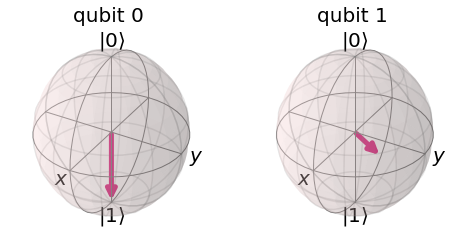

In [129]:
out = execute(circuit,state_backend).result().get_statevector()
plot_bloch_multivector(out)

### Exercise 4.45: (Measurement commutes with controls)
A consequence of the principle of deferred measurement is that measurements commute with quantum gates when the qubit being measured is a control qubit, that is:
(Recall that the double lines represent classical bits in this diagram.) Prove the ~first~ equality. ~The rightmost circuit is simply a convenient notation to depict the use of a measurement result to classically control a quantum gate.~

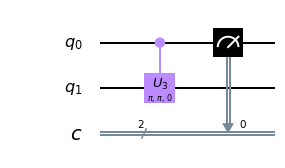

In [37]:
c_meas = QuantumCircuit(2, 2)
c_meas.cu3(np.pi,np.pi,0,0, 1)
c_meas.measure(0, 0)
c_meas.draw(output='mpl')

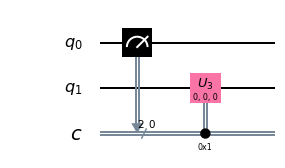

In [68]:
qr = QuantumRegister(2, name="q")
c = ClassicalRegister(2, name="c")
meas_c = QuantumCircuit(qr, c)
meas_c.measure(0, 0)
meas_c.u3(0,0,0,1).c_if(c, 1)
meas_c.draw(output='mpl')

### Answer:
Let the input state $ \left|\psi_{in}\right> = a\left|00\right> + b\left|01\right>+c\left|10\right>+d\left|11\right>$.


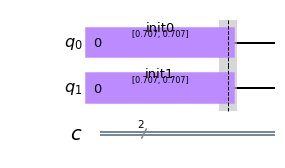

In [117]:
input_state = QuantumCircuit(2, 2)
initial_state0 = [1/2**(0.5),1/2**(0.5)]
initializer0 = Initialize(initial_state0)
initializer0.label = "init0"
initial_state1 = [1/2**(0.5),1/2**(0.5)]
initializer1 = Initialize(initial_state1)
initializer1.label = "init1"
input_state.append(initializer0, [0])
input_state.append(initializer1, [1])
input_state.barrier()
input_state.draw('mpl')

In [118]:
state_backend = Aer.get_backend('statevector_simulator')
job = execute(input_state, state_backend)
result = job.result()
outputstate = result.get_statevector(input_state, decimals=3)
print("\n [a, b, c, d] = ",outputstate)


 [a, b, c, d] =  [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


In the upper circuit, the input state evolves as follows.

\begin{eqnarray}
\left|\psi_{in}\right> &\xrightarrow{controlled-U}& \left|0\right> \otimes \left(a\left|0\right>+ b\left|1\right> \right)+\left|1\right> \otimes U\left(c\left|0\right>+ d \left|1\right> \right)\\
&\xrightarrow{\rm{　Measure　　}}&\begin{cases}\displaystyle
\frac{\left|1\right>\otimes(a\left|0\right> +b\left|1\right>)}{\sqrt{\left|a\right|^2+\left|b\right|^2}}\,\,\,\,\,\,\,\,\,\mathrm{with\, probability}\,\left|a\right|^2+\left|b\right|^2\\\displaystyle
\frac{\left|1\right>\otimes U(c\left|0\right> +d\left|1\right>)}{\sqrt{\left|c\right|^2+\left|d\right|^2}}\,\,\,\,\,\mathrm{with\, probability}\,\left|c\right|^2+\left|d\right|^2\\
\end{cases}
\end{eqnarray}

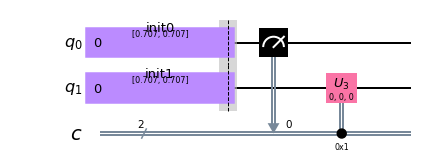

In [119]:
circuit0 = input_state+meas_c
circuit0.draw('mpl')

In [120]:
job = execute(circuit0, state_backend)
result = job.result()
outputstate = result.get_statevector(circuit0, decimals=3)
print("\n [a, b, c, d] = ",outputstate)


 [a, b, c, d] =  [0.   +0.j 0.707+0.j 0.   +0.j 0.707+0.j]


In the lower circuit, the input state evolves as follows. Notice that the final state is the same as that of the upper circuit.

\begin{eqnarray}
\left|\psi_{in}\right> &\xrightarrow{　\rm{Measure}　　}&\begin{cases}\displaystyle
\frac{\left|1\right>\otimes(a\left|0\right> +b\left|1\right>)}{\sqrt{\left|a\right|^2+\left|b\right|^2}}\,\,\,\,\,\mathrm{with\, probability}\,\left|a\right|^2+\left|b\right|^2\\\displaystyle
\frac{\left|1\right>\otimes(c\left|0\right> +d\left|1\right>)}{\sqrt{\left|c\right|^2+\left|d\right|^2}}\,\,\,\,\,\mathrm{with\, probability}\,\left|c\right|^2+\left|d\right|^2\\
\end{cases}\\
&\xrightarrow{controlled-U}&\begin{cases}\displaystyle
\frac{\left|1\right>\otimes(a\left|0\right> +b\left|1\right>)}{\sqrt{\left|a\right|^2+\left|b\right|^2}}\\\displaystyle
\frac{\left|1\right>\otimes U(c\left|0\right> +d\left|1\right>)}{\sqrt{\left|c\right|^2+\left|d\right|^2}}\\
\end{cases}
\end{eqnarray}

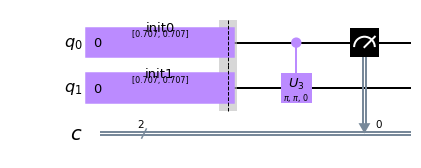

In [121]:
circuit1 = input_state+c_meas
circuit1.draw('mpl')

In [122]:
job = execute(circuit1, state_backend)
result = job.result()
outputstate = result.get_statevector(circuit1, decimals=3)
print("\n [a, b, c, d] = ",outputstate)


 [a, b, c, d] =  [0.707-0.j 0.   +0.j 0.707-0.j 0.   +0.j]


The qasm_simulator gives the experimental results of equivalence of these circuits.

In [123]:
from qiskit.visualization import plot_histogram

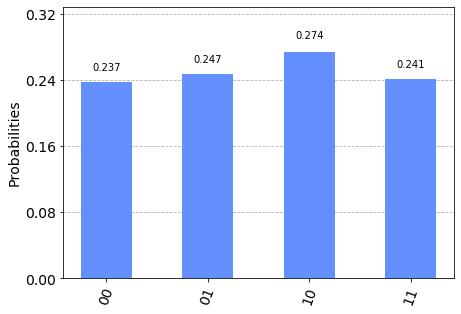

In [124]:
circuit0.measure(1,1)
qasm_backend = Aer.get_backend('qasm_simulator')
job = execute(circuit0, qasm_backend, shots=1024)
result = job.result()
counts = result.get_counts(circuit0)
plot_histogram(counts)

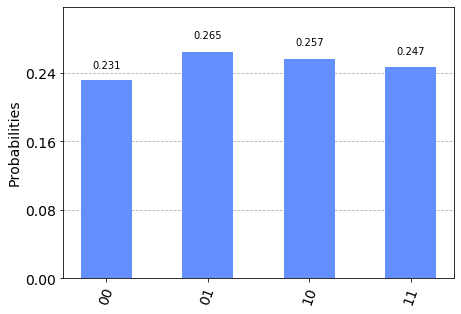

In [125]:
circuit1.measure(1,1)
qasm_backend = Aer.get_backend('qasm_simulator')
job = execute(circuit1, qasm_backend, shots=1024)
result = job.result()
counts = result.get_counts(circuit1)
plot_histogram(counts)